# How to Add a Composite Score

Composite scores represent small sets of data points that are highly related to one another, both conceptually and statistically. Combining and presenting these items as a single score reduces the potential for information overload.

In [1]:
# Load in numpy and pandas
import pandas as pd
import numpy as np

In [2]:
#Read in the dataset with Pandas
df=pd.read_csv('Desktop/Data/composite_example.csv')

In [3]:
#Check the first five rows
df.head()

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions
0,Account 1,493,170,1478.52,5018,6350,35725
1,Account 2,224,77,739.26,2567,2552,15608
2,Account 3,313,95,719.28,2547,3550,20618
3,Account 4,810,253,2167.83,7389,9402,51763
4,Account 5,444,159,1418.58,4816,5407,34050


In [4]:
# Scaled the data so that we can put all the vales on a Standardard Normal Distribution. This distribution ranges from 1 to -1.
# Also we use MinMax scaler to scale our final composite score. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale = StandardScaler()
max_scale = MinMaxScaler()

In [5]:
#we need to isolate the numberic columns to run the scaler on.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(numerics)

,Leads,Converted,Sale Amount,Visits,Clicks,Impressions
0,493,170,1478.52,5018,6350,35725
1,224,77,739.26,2567,2552,15608
2,313,95,719.28,2547,3550,20618
3,810,253,2167.83,7389,9402,51763
4,444,159,1418.58,4816,5407,34050
5,187,57,689.31,2432,2515,14414
6,80,192,2137.86,7252,8389,46082


In [6]:
# first we need to call the the StandardScaler function and apply it to the numberic columns. We can isolate the column. 
numerical_columns = df.select_dtypes(numerics).columns

In [7]:
#Create a copy so we a keep thep the orginal dataset
df2 =df.copy()

In [8]:
#Scale the data and check the head
df2[numerical_columns] = scale.fit_transform(df2[numerical_columns])
df2.head()

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions
0,Account 1,0.570009,0.411222,0.238013,0.221483,0.351434,0.332266
1,Account 2,-0.622577,-1.020360,-0.994894,-1.002345,-1.135156,-1.138405
2,Account 3,-0.228004,-0.743279,-1.028216,-1.012331,-0.744525,-0.772144
3,Account 4,1.975399,1.688871,1.387615,1.405366,1.546029,1.504738
4,Account 5,0.352773,0.241896,0.138048,0.120621,-0.017670,0.209814


In [9]:
#Create a Composite column by summing the values accross the columns
df2['Composite'] = df2.sum(axis=1)
df2.head()

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions,Composite
0,Account 1,0.570009,0.411222,0.238013,0.221483,0.351434,0.332266,2.124428
1,Account 2,-0.622577,-1.020360,-0.994894,-1.002345,-1.135156,-1.138405,-5.913737
2,Account 3,-0.228004,-0.743279,-1.028216,-1.012331,-0.744525,-0.772144,-4.528500
3,Account 4,1.975399,1.688871,1.387615,1.405366,1.546029,1.504738,9.508019
4,Account 5,0.352773,0.241896,0.138048,0.120621,-0.017670,0.209814,1.045481


In [10]:
# The negative values are not going to scale the Composite Score column with the Min Max Scale
df2['Composite'] = max_scale.fit_transform(df2[['Composite']])

In [11]:
df2.head()

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions,Composite
0,Account 1,0.570009,0.411222,0.238013,0.221483,0.351434,0.332266,0.542702
1,Account 2,-0.622577,-1.020360,-0.994894,-1.002345,-1.135156,-1.138405,0.044864
2,Account 3,-0.228004,-0.743279,-1.028216,-1.012331,-0.744525,-0.772144,0.130658
3,Account 4,1.975399,1.688871,1.387615,1.405366,1.546029,1.504738,1.000000
4,Account 5,0.352773,0.241896,0.138048,0.120621,-0.017670,0.209814,0.475879


In [12]:
# Create a letter score
df2['Letter Score'] = pd.qcut(df2['Composite'],3,labels=['C','B','A'])

In [13]:
df2

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions,Composite,Letter Score
0,Account 1,0.570009,0.411222,0.238013,0.221483,0.351434,0.332266,0.542702,B
1,Account 2,-0.622577,-1.020360,-0.994894,-1.002345,-1.135156,-1.138405,0.044864,C
2,Account 3,-0.228004,-0.743279,-1.028216,-1.012331,-0.744525,-0.772144,0.130658,C
3,Account 4,1.975399,1.688871,1.387615,1.405366,1.546029,1.504738,1.000000,A
4,Account 5,0.352773,0.241896,0.138048,0.120621,-0.017670,0.209814,0.475879,B
5,Account 6,-0.786613,-1.328227,-1.078199,-1.069753,-1.149638,-1.225693,0.000000,C
6,Account 7,-1.260988,0.749876,1.337633,1.336959,1.149527,1.089424,0.683789,A


In [14]:
# the letter column to the original dataset. 
df['Letter Score'] =df2['Letter Score']
df

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions,Letter Score
0,Account 1,493,170,1478.52,5018,6350,35725,B
1,Account 2,224,77,739.26,2567,2552,15608,C
2,Account 3,313,95,719.28,2547,3550,20618,C
3,Account 4,810,253,2167.83,7389,9402,51763,A
4,Account 5,444,159,1418.58,4816,5407,34050,B
5,Account 6,187,57,689.31,2432,2515,14414,C
6,Account 7,80,192,2137.86,7252,8389,46082,A


In [15]:
# We need to sort the column for the letter score. so lets add the Composite column and sort
df['Composite'] =df2['Composite']
df.sort_values(by="Composite",ascending=False)

,Account,Leads,Converted,Sale Amount,Visits,Clicks,Impressions,Letter Score,Composite
3,Account 4,810,253,2167.83,7389,9402,51763,A,1.000000
6,Account 7,80,192,2137.86,7252,8389,46082,A,0.683789
0,Account 1,493,170,1478.52,5018,6350,35725,B,0.542702
4,Account 5,444,159,1418.58,4816,5407,34050,B,0.475879
2,Account 3,313,95,719.28,2547,3550,20618,C,0.130658
1,Account 2,224,77,739.26,2567,2552,15608,C,0.044864
5,Account 6,187,57,689.31,2432,2515,14414,C,0.000000


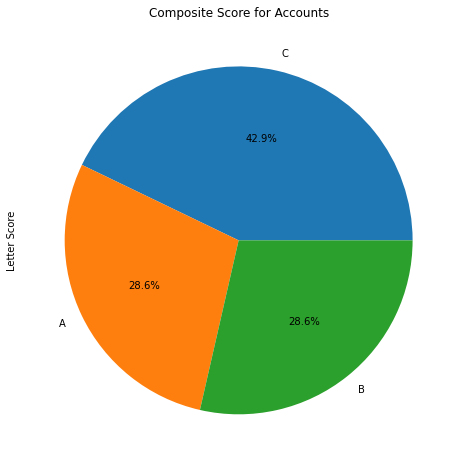

In [18]:
#Plot the scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title("Composite Score for Accounts")
df['Letter Score'].value_counts().plot.pie(autopct='%.1f%%');